In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
from PyLR3M.utils import first_order_derivative_filter, get_matrix_gradient

Dh = first_order_derivative_filter(7,1)
Dv = first_order_derivative_filter(7,3)
print(Dv)
print(Dv.T)

[[-1.  0.  0.  1.  0.  0.  0.]
 [ 0. -1.  0.  0.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.  1.  0.]
 [ 0.  0.  0. -1.  0.  0.  1.]
 [ 0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.]]
[[-1.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.]
 [ 1.  0.  0. -1.  0.  0.  0.]
 [ 0.  1.  0.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.]
 [ 0.  0.  0.  1.  0.  0. -1.]]


In [38]:
print(Dh.T @ Dh)
print(Dv.T @ Dv)

[[ 1. -1.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0. -1.  2.]]
[[ 1.  0.  0. -1.  0.  0.  0.]
 [ 0.  1.  0.  0. -1.  0.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.]
 [-1.  0.  0.  2.  0.  0. -1.]
 [ 0. -1.  0.  0.  2.  0.  0.]
 [ 0.  0. -1.  0.  0.  2.  0.]
 [ 0.  0.  0. -1.  0.  0.  2.]]


(454, 807, 3)


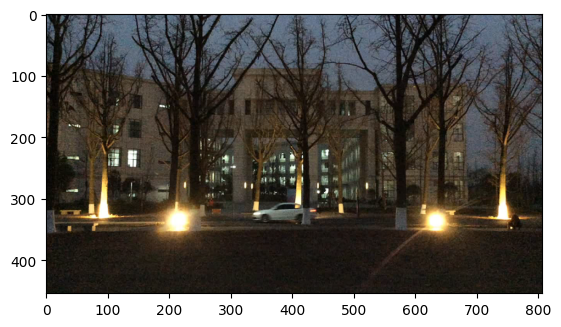

In [13]:
from PIL import Image
im_in = Image.open('data/1.bmp')
plt.imshow(im_in)
print(np.array(im_in).shape)

In [16]:
Lhat = np.mean(im_in,2)
[n,m] = Lhat.shape
Dh = first_order_derivative_filter(m,-1)
Dv = first_order_derivative_filter(n)
delh_Lhat, delv_Lhat = get_matrix_gradient(Lhat, Dh, Dv)

delh_lhat = np.reshape(delh_Lhat,-1)
ad = np.diag(0.015/(np.abs(delh_lhat)+1e-10))

In [17]:
print(ad.shape)

(366378, 366378)


In [18]:
454*807

366378

In [22]:
import scipy.sparse as sparse

ti = sparse.eye_array(454*807,k=20)
sparse_ad = sparse.diags_array(0.015/(np.abs(delh_lhat)+1e-10))

v = ti @ sparse_ad

In [34]:
I2 = np.zeros((434,787))
I2[::10,::10] = 1
# print(I2)

[a,b] = np.nonzero(I2)
print(len(a))

3476


In [28]:
a = np.arange(20)
print(a[10:0])

[]


In [29]:
np.min(1,0)

np.int64(1)

In [1]:
import bm3d

In [3]:
help(bm3d.bm3d)

Help on function bm3d in module bm3d:

bm3d(z: numpy.ndarray, sigma_psd: Union[numpy.ndarray, list, float], profile: Union[bm3d.profiles.BM3DProfile, str] = 'np', stage_arg: Union[bm3d.profiles.BM3DStages, numpy.ndarray] = <BM3DStages.ALL_STAGES: 3>, blockmatches: tuple = (False, False)) -> Union[numpy.ndarray, Tuple[numpy.ndarray, Tuple[numpy.ndarray, numpy.ndarray]]]
    Perform BM3D denoising on z: either hard-thresholding, Wiener filtering or both.

    :param z: Noisy image. either MxN or MxNxC where C is the channel count.
              For multichannel images, blockmatching is performed on the first channel.
    :param sigma_psd: Noise PSD, either MxN or MxNxC (different PSDs for different channels)
            or
           sigma_psd: Noise standard deviation, either float, or length C list of floats
    :param profile: Settings for BM3D: BM3DProfile object or a string
                    ('np', 'refilter', 'vn', 'vn_old', 'high', 'deb'). Default 'np'.
    :param stage_arg: Det